In [1]:
import duckdb

# Conectar ao banco de dados principal
conn = duckdb.connect(database='fineweb.duckdb', read_only=True)

# Executar a consulta modificada
df_training = conn.execute(f"""
WITH sampled_a AS (
    SELECT d.*
    FROM dataset_details d
),
sampled_b AS (
    SELECT d.*
    FROM dataset_details d
)
SELECT
	fn.name AS name,
	a.content AS content1,
	b.content AS content2,
	a.indice - b.indice AS target,
	SIGN(a.indice - b.indice) * LN(1 + ABS(a.indice - b.indice)) AS target_transformed,
	a.content_length AS a_content_length,  -- Renomeado
	b.content_length AS b_content_length   -- Renomeado
FROM sampled_a a
JOIN sampled_b b ON a.name_id = b.name_id
JOIN names fn ON fn.name_id = a.name_id
--ORDER BY ((a.content_length + b.content_length) * ((1/(1+ABS(target)))/100) ) DESC
ORDER BY (a.content_length + b.content_length) DESC
LIMIT 20000 OFFSET 0
""").df()

conn.close()

df_training

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,name,content1,content2,target,target_transformed,a_content_length,b_content_length
0,http://careerhq.fita.org/jobs/10141937/members...,"As a member of APA's marketing team, the membe...","As a member of APA's marketing team, the membe...",0,0.000000,2518,2518
1,http://www.startuphire.com/job/proposal-writer...,for specific audiences and ensuring alignment ...,for specific audiences and ensuring alignment ...,0,0.000000,2451,2451
2,http://ficourseworkpccw.modelbook.us/cultural-...,Cultural challenges of international business ...,Cultural challenges of international business ...,0,0.000000,2399,2399
3,https://www.bowlesonline.com/resume/,"complex product portfolio, and ease onboarding...","complex product portfolio, and ease onboarding...",0,0.000000,2365,2365
4,http://www.startuphire.com/job/proposal-writer...,for specific audiences and ensuring alignment ...,provide advisory services for developing and c...,1761,7.474205,2451,2266
...,...,...,...,...,...,...,...
19995,http://www.skinstore.com/lycopene.aspx?ft=lyco...,Lycopene is a natural compound found in plants...,Lycopene is a natural compound found in plants...,0,0.000000,1945,1945
19996,https://jimnewheiser.com/counseling/a-phased-r...,1 – Just as the COVID crisis began with an alm...,1 – Just as the COVID crisis began with an alm...,0,0.000000,1945,1945
19997,https://www.crimeandjustice.org.uk/publication...,'offender' retains its utility in the complex ...,Rebecca Roberts questions the use of language ...,15438,9.644652,1971,1919
19998,https://www.crimeandjustice.org.uk/publication...,know that when we move from an adjective for c...,and should be at the forefront of our thinking...,3124,8.047190,1966,1924


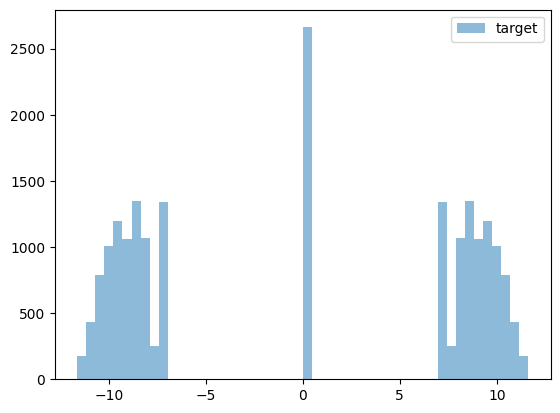

In [2]:
import matplotlib.pyplot as plt

plt.hist(df_training['target_transformed'], bins=50, alpha=0.5, label='target')
plt.legend()
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
import pickle

# Escalonar os dados
scaler = StandardScaler()
df_training['target_norm'] = scaler.fit_transform(df_training[['target_transformed']])

# Salvando o scaler no disco
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
df_training

,name,content1,content2,target,target_transformed,a_content_length,b_content_length,target_norm
0,http://careerhq.fita.org/jobs/10141937/members...,"As a member of APA's marketing team, the membe...","As a member of APA's marketing team, the membe...",0,0.000000,2518,2518,-0.000057
1,http://www.startuphire.com/job/proposal-writer...,for specific audiences and ensuring alignment ...,for specific audiences and ensuring alignment ...,0,0.000000,2451,2451,-0.000057
2,http://ficourseworkpccw.modelbook.us/cultural-...,Cultural challenges of international business ...,Cultural challenges of international business ...,0,0.000000,2399,2399,-0.000057
3,https://www.bowlesonline.com/resume/,"complex product portfolio, and ease onboarding...","complex product portfolio, and ease onboarding...",0,0.000000,2365,2365,-0.000057
4,http://www.startuphire.com/job/proposal-writer...,for specific audiences and ensuring alignment ...,provide advisory services for developing and c...,1761,7.474205,2451,2266,0.884349
...,...,...,...,...,...,...,...,...
19995,http://www.skinstore.com/lycopene.aspx?ft=lyco...,Lycopene is a natural compound found in plants...,Lycopene is a natural compound found in plants...,0,0.000000,1945,1945,-0.000057
19996,https://jimnewheiser.com/counseling/a-phased-r...,1 – Just as the COVID crisis began with an alm...,1 – Just as the COVID crisis began with an alm...,0,0.000000,1945,1945,-0.000057
19997,https://www.crimeandjustice.org.uk/publication...,'offender' retains its utility in the complex ...,Rebecca Roberts questions the use of language ...,15438,9.644652,1971,1919,1.141173
19998,https://www.crimeandjustice.org.uk/publication...,know that when we move from an adjective for c...,and should be at the forefront of our thinking...,3124,8.047190,1966,1924,0.952149


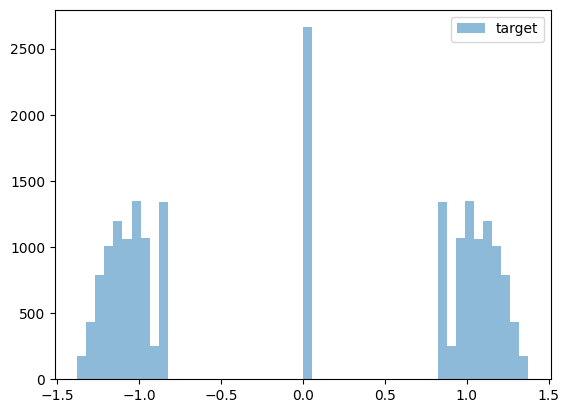

In [4]:
plt.hist(df_training['target_norm'], bins=50, alpha=0.5, label='target')
plt.legend()
plt.show()

In [5]:
del df_training

In [ ]:
#  Converter DataLoader para iterador
data_iter = iter(train_dataloader)
# Pegar o primeiro lote
embeddings, lengths, targets = next(data_iter)
embeddings.shape

In [6]:
import pickle

# Carregando o scaler novamente
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [10]:
# Obtém as médias das características
medias = scaler.mean_
print("Médias:", medias)

# Obtém os desvios padrão das características
desvios_padrao = scaler.scale_
print("Desvios Padrão:", desvios_padrao)

# Dados a serem transformados
X_novo = np.array([1,0,-1])

# Aplicando a transformação manualmente
X_transformado = (X_novo - scaler.mean_) / scaler.scale_
print("Dados transformados manualmente:\n", X_transformado)

Médias: [0.00048223]
Desvios Padrão: [8.45109926]
Dados transformados manualmente:
 [ 1.18270740e-01 -5.70615239e-05 -1.18384863e-01]


In [7]:
import pandas as pd

single_value_df = pd.DataFrame([[1.0],[-1.0]], columns=['target_transformed'])

valor_escalonado = scaler.transform(single_value_df)

# Definir os limites para considerar positivo ou negativo
negative_threshold = valor_escalonado[0][0]
positive_threshold = valor_escalonado[1][0]

print("negative_threshold:", negative_threshold)
print("positive_threshold:", positive_threshold)

# Reverter a transformação
valor_revertido = scaler.inverse_transform(valor_escalonado)
print("Valor revertido:", valor_revertido.tolist())

negative_threshold: 0.11827074043852796
positive_threshold: -0.11838486348635978
Valor revertido: [[1.0], [-1.0]]


In [1]:
import numpy as np

def signed_log_transform(y):
    return np.sign(y) * np.log1p(np.abs(y))

def inverse_signed_log_transform(y_transformed):
    return np.sign(y_transformed) * (np.expm1(np.abs(y_transformed)))

def dissimilaridade(S):
	epsilon = 0
	if S == 0:
		max_x = np.log(np.finfo(np.float32).max)
		epsilon = (1/(max_x-1))
        
	return (1 - (S+epsilon)) / (S+epsilon)

In [2]:
# Definir os limites para considerar positivo ou negativo
negative_threshold = signed_log_transform(-1)
positive_threshold = signed_log_transform(1)

print("negative_threshold:", negative_threshold)
print("positive_threshold:", positive_threshold)

negative_threshold: -0.6931471805599453
positive_threshold: 0.6931471805599453


In [3]:
import torch
import gc

if not torch.cuda.is_available():
    print("CUDA is not available. Please ensure you have a compatible GPU and drivers installed.")
else:
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [4]:
import torch
import numpy as np
from transformers import AutoTokenizer
import os

# Definir paralelismo corretamente
os.environ["TOKENIZERS_PARALLELISM"] = "true"

class TextToEmbedding:
    def __init__(self, weights_path, num_ids=128256, vector_size=2048, device='cpu'):
        """
        Inicializa a classe TextToEmbedding sem padding fixo.

        Args:
            weights_path (str): Caminho para o arquivo .npy que contém os pesos.
            num_ids (int, opcional): Número total de IDs. Padrão é 128256.
            vector_size (int, opcional): Tamanho de cada vetor de embedding. Padrão é 2048.
            device (str, opcional): Dispositivo para carregar os tensores ('cpu' ou 'cuda'). Padrão é 'cpu'.
        """
		
        self.device = device

        # Carrega o tokenizer sem padding fixo
        self.tokenizer = AutoTokenizer.from_pretrained("unsloth/Llama-3.2-1B", use_fast=True)
        
        # Carrega os pesos a partir do arquivo .npy
        try:
            weights_np = np.load(weights_path)
            self.weights = torch.from_numpy(weights_np).to(self.device)
        except FileNotFoundError:
            raise FileNotFoundError(f"O arquivo de pesos '{weights_path}' não foi encontrado.")
        except Exception as e:
            raise RuntimeError(f"Erro ao carregar os pesos: {e}")
        
        # Verifica a forma dos pesos
        if self.weights.shape != (num_ids, vector_size):
            raise ValueError(f"O formato do arquivo weights.npy é {self.weights.shape}, mas era esperado {(num_ids, vector_size)}.")

embedding_generator = TextToEmbedding("weights_half.npy", device='cpu')

In [5]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import numpy as np

class SequenceDataset_val(Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)

        # Normalizar o target
        #self.df['target_norm'] = scaler.transform(self.df[['target_transformed']])

        # Definir o número de elementos originais em cada coluna
        num_content1 = len(self.df['content1'])

        # Combinar as duas colunas de conteúdo em uma lista
        contents = list(self.df['content1']) + list(self.df['content2'])

        # Tokenização combinada
        encoding = embedding_generator.tokenizer(
            contents,
            return_tensors="pt",
            padding=True,  # Padding dinâmico
            truncation=True
        )

        # Separar os encodings de volta para cada conjunto
        encoding1 = {key: encoding[key][:num_content1] for key in encoding.keys()}
        encoding2 = {key: encoding[key][num_content1:] for key in encoding.keys()}

        # Converter para o dispositivo
        input_ids1 = encoding1['input_ids'].to(embedding_generator.device)
        attention_mask1 = encoding1['attention_mask'].to(embedding_generator.device)
        input_ids2 = encoding2['input_ids'].to(embedding_generator.device)
        attention_mask2 = encoding2['attention_mask'].to(embedding_generator.device)

        # Obter embeddings
        embeddings1 = embedding_generator.weights[input_ids1]
        embeddings2 = embedding_generator.weights[input_ids2]

        # Concatenar as duas sequências no eixo 1
        self.embeddings = torch.stack([embeddings1, embeddings2], dim=1)  # (batch_size, 2, seq_length, vector_size)

        # Calcular comprimentos
        lengths1 = attention_mask1.sum(dim=1)
        lengths2 = attention_mask2.sum(dim=1)
        self.lengths = torch.stack([lengths1, lengths2], dim=1)  # (batch_size, 2)

        # Calcular comprimento combinado (exemplo: máximo dos dois)
        combined_lengths = torch.max(lengths1, lengths2)

        # Obter índices ordenados em ordem decrescente de comprimento combinado
        sorted_idx = combined_lengths.argsort(descending=True)

        # Ordenar embeddings, comprimentos e targets
        self.embeddings = self.embeddings[sorted_idx]
        self.lengths = self.lengths[sorted_idx]
        self.targets = torch.tensor(self.df['target_transformed'].values, dtype=torch.float16)[sorted_idx]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.lengths[idx], self.targets[idx]

In [ ]:
import torch
from torch.utils.data import IterableDataset, DataLoader
import duckdb
from tqdm import tqdm
import pandas as pd

db1_path = 'fineweb.duckdb'
batch_size = 150

class IterableSequenceDataset(IterableDataset):
    def __init__(self, db1_path, batch_size):
        super(IterableSequenceDataset, self).__init__()
        self.db1_path = db1_path
        self.batch_size = batch_size
        self.offset = 0

    def _fetch_data(self, conn):
        query = f"""        
WITH sampled_a AS (
    SELECT d.*
    FROM dataset_details d
),
sampled_b AS (
    SELECT d.*
    FROM dataset_details d
)
SELECT
	fn.name AS name,
	a.content AS content1,
	b.content AS content2,
	a.indice - b.indice AS target,
	SIGN(a.indice - b.indice) * LN(1 + ABS(a.indice - b.indice)) AS target_transformed,
	a.content_length AS a_content_length,  -- Renomeado
	b.content_length AS b_content_length   -- Renomeado
FROM sampled_a a
JOIN sampled_b b ON a.name_id = b.name_id
JOIN names fn ON fn.name_id = a.name_id
--ORDER BY ((a.content_length + b.content_length) * ((1/(1+ABS(target)))/100) ) DESC
ORDER BY (a.content_length + b.content_length) DESC
LIMIT {self.batch_size} OFFSET {self.offset}
        """
        df = conn.execute(query).df()
        self.offset += 1

        if df.empty:
            return None, None, None  # Indica que não há mais dados

        # Normalizar o target
        #df['target_norm'] = scaler.transform(df[['target_transformed']])

        # Defina o número de elementos originais em cada coluna
        num_content1 = len(df['content1'])

        # Combinar as duas colunas de conteúdo em uma lista
        contents = list(df['content1']) + list(df['content2'])

        # Tokenização combinada
        encoding = embedding_generator.tokenizer(
            contents,
            return_tensors="pt",
            padding=True,  # Padding dinâmico
            truncation=True
        )

        # Separar os encodings de volta para cada conjunto
        encoding1 = {key: encoding[key][:num_content1] for key in encoding.keys()}
        encoding2 = {key: encoding[key][num_content1:] for key in encoding.keys()}

        # Converter para o dispositivo
        input_ids1 = encoding1['input_ids'].to(embedding_generator.device)
        attention_mask1 = encoding1['attention_mask'].to(embedding_generator.device)
        input_ids2 = encoding2['input_ids'].to(embedding_generator.device)
        attention_mask2 = encoding2['attention_mask'].to(embedding_generator.device)

        # Obter embeddings
        embeddings1 = embedding_generator.weights[input_ids1]
        embeddings2 = embedding_generator.weights[input_ids2]

        # Concatenar as duas sequências no eixo 1
        embeddings = torch.stack([embeddings1, embeddings2], dim=1)  # (batch_size, 2, seq_length, vector_size)

        # Calcular comprimentos
        lengths1 = attention_mask1.sum(dim=1)
        lengths2 = attention_mask2.sum(dim=1)
        lengths = torch.stack([lengths1, lengths2], dim=1)  # (batch_size, 2)

        # Calcular comprimento combinado (máximo dos dois)
        combined_lengths = torch.max(lengths1, lengths2)

        # Obter índices ordenados em ordem decrescente de comprimento combinado
        sorted_idx = combined_lengths.argsort(descending=True)

        # Ordenar embeddings, comprimentos e targets
        embeddings = embeddings[sorted_idx]
        lengths = lengths[sorted_idx]
        targets = torch.tensor(df['target_transformed'].values, dtype=torch.float16)[sorted_idx]

        return embeddings, lengths, targets

    def __iter__(self):
        """
        Iterator que gera dados continuamente.

        Yields:
            tuple: (embeddings, lengths, targets) para cada amostra.
        """
        # Estabelecer conexão com DuckDB
        conn = duckdb.connect(database=self.db1_path, read_only=True)
        conn.execute("SET enable_progress_bar=false")

        # Anexar o segundo banco de dados com um alias 'db2'
        #conn.execute(f"ATTACH '{self.db2_path}' AS db2")

        try:
            while True:
                embeddings, lengths, targets = self._fetch_data(conn)
                if embeddings is None:
                    break  # Termina a iteração se não houver mais dados

                yield embeddings, lengths, targets
                
        finally:
            # Garantir que a conexão seja fechada quando o iterador for finalizado
            conn.close()

In [7]:
import pandas as pd

data = {
    'target_transformed': [signed_log_transform(1)]*50,
    "content1": ["A tempestade durou várias horas durante a noite.", "Ele estudou intensamente para o exame.", "A fábrica reduziu a emissão de poluentes.", "Maria começou a praticar exercícios regularmente.", "O motor do carro parou de funcionar.", "Houve uma forte seca na região.", "Ela começou a dormir melhor.", "A escola adotou uma alimentação saudável.", "O projeto teve apoio governamental.", "A internet caiu durante a reunião.", "Ele começou a economizar dinheiro mensalmente.", "A estrada estava em péssimo estado de conservação.", "O sistema de ar condicionado foi desligado no escritório.", "A empresa investiu em marketing digital.", "Ana não revisou o relatório antes de enviar.", "As crianças brincaram no parque até tarde.", "O curso de capacitação foi oferecido aos funcionários.", "Ele comprou um celular novo com câmera de alta qualidade.", "A reforma no prédio foi concluída.", "A região teve um crescimento populacional rápido.", "Carla começou a meditar diariamente.", "O atleta intensificou seu treino antes da competição.", "O sinal de celular na região foi ampliado.", "As temperaturas caíram drasticamente durante o inverno.", "Ele não configurou o alarme antes de dormir.", "A empresa ofereceu benefícios extras para seus funcionários.", "Houve um vazamento de gás na cozinha do restaurante.", "A biblioteca da escola foi modernizada com novos livros e tecnologia.", "Marcos passou a fazer pausas regulares durante o expediente.", "A empresa desenvolveu um aplicativo intuitivo para clientes.", "Devido ao aumento das chuvas nas últimas semanas, o nível dos rios subiu rapidamente e ultrapassou a capacidade das barragens.", "Ela decidiu começar uma rotina de alimentação balanceada, exercícios físicos regulares e meditação diária para melhorar sua saúde física e mental.", "A empresa, que sofria com baixos índices de produtividade, implementou uma nova estratégia de gestão focada no desenvolvimento dos funcionários e na cultura organizacional.", "O governo lançou um programa nacional de reciclagem e incentivou a participação ativa dos cidadãos por meio de campanhas de conscientização em escolas, empresas e residências.", "Após uma longa estiagem que afetou grande parte do território agrícola do país, o governo implementou um pacote emergencial de apoio aos agricultores, incluindo subsídios e incentivos para a recuperação das lavouras.", "Ele deixou o celular carregando a noite inteira sem usar carregadores de segurança e em um local sem ventilação.", "A comunidade local se uniu para limpar e revitalizar a praça abandonada, que estava sem manutenção há anos e havia se tornado um ponto de descarte irregular de lixo.", "Durante a reforma do prédio, descobriu-se que a estrutura tinha falhas graves, e o prazo para conclusão foi ampliado em seis meses para garantir a segurança.", "Um furacão atingiu a região costeira do país, com ventos de mais de 200 km/h, causando destruição em várias cidades e deixando milhares de pessoas desabrigadas.", "Ela esqueceu de regar a planta de sua varanda durante o mês todo, e o clima estava seco.", "João quebrou o braço jogando futebol.", "Devido a uma combinação de fatores climáticos extremos, incluindo ventos fortes e chuvas intensas, a região sofreu graves danos estruturais e interrupção no fornecimento de energia elétrica por vários dias.", "Ela esqueceu de levar o guarda-chuva.", "A empresa adotou práticas sustentáveis em sua produção, reduzindo o uso de plástico e implementando programas de reciclagem.", "A criança se recusou a comer legumes durante toda a semana.", "Após anos de pesquisa e desenvolvimento, a equipe científica finalmente descobriu um método eficiente para produzir energia limpa a partir de fontes renováveis.", "O café da manhã foi esquecido.", "A iniciativa comunitária organizou mutirões de limpeza nas praias locais regularmente durante o verão.", "Ele atualizou seu currículo e participou de várias entrevistas de emprego nos últimos meses.", "O artista decidiu experimentar novas técnicas em suas pinturas, incorporando elementos digitais e materiais reciclados em suas obras."],
    "content2": ["Pela manhã, muitas ruas estavam alagadas.", "Conseguiu uma nota alta na prova.", "A qualidade do ar na cidade melhorou.", "Ela perdeu peso e aumentou sua energia.", "Ele teve que chamar o guincho para levar o carro à oficina.", "As plantações foram prejudicadas, e a colheita foi menor.", "Sua disposição durante o dia melhorou significativamente.", "Os alunos passaram a ter mais energia e melhor concentração.", "Conseguiu concluir as fases iniciais rapidamente.", "A comunicação com a equipe foi interrompida.", "Conseguiu juntar uma quantia para uma viagem.", "O trânsito ficou mais lento e perigoso para os motoristas.", "O ambiente ficou quente e desconfortável para os funcionários.", "As vendas aumentaram significativamente.", "O documento continha erros e precisou ser corrigido.", "Elas ficaram cansadas e dormiram rapidamente ao chegar em casa.", "Eles melhoraram suas habilidades e eficiência no trabalho.", "Passou a tirar fotos mais nítidas e de melhor resolução.", "O local ficou mais seguro e esteticamente agradável.", "A demanda por moradias e serviços aumentou consideravelmente.", "Ela sentiu uma melhora no seu foco e redução do estresse.", "Teve um melhor desempenho e conquistou o primeiro lugar.", "A conexão ficou mais estável e acessível para os moradores.", "A procura por agasalhos e cobertores aumentou nas lojas.", "Acabou se atrasando para o trabalho na manhã seguinte.", "A satisfação e motivação dos colaboradores aumentaram.", "O local foi evacuado por segurança, e o serviço foi interrompido temporariamente.", "Os alunos começaram a frequentá-la mais e a melhorar seu desempenho acadêmico.", "Ele se sentiu mais produtivo e menos cansado ao final do dia.", "O número de usuários aumentou rapidamente.", "Diversas áreas urbanas e rurais foram afetadas por inundações, forçando muitas famílias a deixarem suas casas temporariamente.", "Em poucos meses, notou uma grande melhora em sua disposição, concentração e níveis de energia, além de perder peso.", "Em menos de um ano, a moral da equipe melhorou, a rotatividade diminuiu, e a produtividade geral aumentou em cerca de 30%.", "Como resultado, houve uma redução significativa na quantidade de resíduos sólidos em aterros e uma maior economia de recursos naturais.", "Em um ano, a produção agrícola voltou a níveis estáveis, e o impacto econômico negativo foi mitigado, beneficiando a população.", "Pela manhã, o dispositivo estava superaquecido e apresentou danos permanentes na bateria, reduzindo sua capacidade de funcionamento.", "Com a revitalização, a praça voltou a ser um local de encontro para moradores, e a segurança da área também melhorou.", "Apesar do atraso, a reforma resultou em um edifício mais seguro, confortável e com um aumento significativo no valor do imóvel.", "A resposta emergencial foi mobilizada rapidamente, com abrigos temporários e ajuda humanitária distribuída para minimizar o impacto nas vítimas.", "A planta murchou completamente e, infelizmente, não conseguiu ser recuperada, tendo que ser substituída.", "Ele ficou impossibilitado de trabalhar por duas semanas.", "A comunidade teve que recorrer a abrigos temporários, e a economia local sofreu uma queda significativa devido à paralisação das atividades comerciais.", "Ficou molhada durante o trajeto para o trabalho.", "A reputação da empresa melhorou, atraindo consumidores conscientes e aumentando as vendas em 20%.", "Sua mãe ficou preocupada com a falta de nutrientes na alimentação dele e decidiu consultar um nutricionista.", "Isso resultou na redução significativa das emissões de carbono e no avanço tecnológico sustentável, beneficiando o meio ambiente globalmente.", "Ela sentiu fome e falta de energia durante a manhã de trabalho.", "As praias ficaram mais limpas e atraentes para turistas, além de promover a conscientização ambiental entre os moradores.", "Finalmente recebeu uma oferta de trabalho em uma empresa renomada, melhorando sua estabilidade financeira.", "Suas peças ganharam destaque em exposições internacionais, ampliando seu reconhecimento e alcance no mercado de arte."]
}

# Crie o DataFrame
df_validation = pd.DataFrame(data)

# Adicionar frases iguais
df_zero = pd.DataFrame({
    'target_transformed': [0] * len(data['target_transformed']),
    'content1': df_validation['content1'],
    'content2': df_validation['content1']
})

# Adicionar frases com a ordem contrária
df_reversed = pd.DataFrame({
    'target_transformed': [signed_log_transform(-1)] * len(data['target_transformed']),
    'content1': df_validation['content2'],
    'content2': df_validation['content1']
})

# Concatenar os dois DataFrames
df_validation = pd.concat([df_zero, df_validation, df_reversed], ignore_index=True)

df_validation

,target_transformed,content1,content2
0,0.000000,A tempestade durou várias horas durante a noite.,A tempestade durou várias horas durante a noite.
1,0.000000,Ele estudou intensamente para o exame.,Ele estudou intensamente para o exame.
2,0.000000,A fábrica reduziu a emissão de poluentes.,A fábrica reduziu a emissão de poluentes.
3,0.000000,Maria começou a praticar exercícios regularmente.,Maria começou a praticar exercícios regularmente.
4,0.000000,O motor do carro parou de funcionar.,O motor do carro parou de funcionar.
...,...,...,...
145,-0.693147,Isso resultou na redução significativa das emi...,"Após anos de pesquisa e desenvolvimento, a equ..."
146,-0.693147,Ela sentiu fome e falta de energia durante a m...,O café da manhã foi esquecido.
147,-0.693147,As praias ficaram mais limpas e atraentes para...,A iniciativa comunitária organizou mutirões de...
148,-0.693147,Finalmente recebeu uma oferta de trabalho em u...,Ele atualizou seu currículo e participou de vá...


In [8]:
def collate_train(batch):
    embeddings, lengths, targets = batch[0]
    return embeddings, lengths, targets

training_dataset = IterableSequenceDataset(db1_path,batch_size)
train_dataloader = DataLoader(
  training_dataset, 
  batch_size=1, 
  num_workers=0,
  collate_fn=collate_train,
  pin_memory=False,
  shuffle=False,
  #persistent_workers=True
)

In [9]:
def collate_fn(batch):
    embeddings, lengths, targets = zip(*batch)
    return torch.stack(embeddings).to(torch.float32), torch.stack(lengths), torch.stack(targets).to(torch.float32)

validation_dataset = SequenceDataset_val(df_validation)
validation_dataloader = DataLoader(
    validation_dataset,
    batch_size=150,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
    collate_fn=collate_fn
)

In [10]:
import torch
import torch.nn as nn
import torch.nn.utils.rnn as rnn_utils

class SequenceEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        """
        Inicializa o SequenceEncoder.

        Args:
            input_size (int): Dimensão da entrada de cada elemento da sequência.
            hidden_size (int): Tamanho do estado oculto do LSTM.
            num_layers (int): Número de camadas do LSTM.
        """
        super(SequenceEncoder, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=0.3,
            batch_first=True,
            bidirectional=False
        )

    def forward(self, sequences, lengths):
        """
        Forward pass do SequenceEncoder.

        Args:
            sequences (Tensor): Tensor de sequências com forma [batch_size, seq_len, input_size].
            lengths (Tensor): Tensor de comprimentos com forma [batch_size].

        Returns:
            Tensor: Representação codificada das sequências com forma [batch_size, hidden_size * num_directions].
        """
        # Empacotar as sequências sem exigir ordenação
        packed_seq = rnn_utils.pack_padded_sequence(
            sequences,
            lengths.cpu(),
            batch_first=True,
            enforce_sorted=False  # Permite sequências não ordenadas
        )

        # Passar pelo LSTM
        packed_output, (hn, cn) = self.lstm(packed_seq)

        hn = hn[-1]  # Forma: [batch_size, hidden_size]

        return hn  # [batch_size, hidden_size * num_directions]

In [11]:
class SiameseModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        """
        Inicializa o SiameseModel.

        Args:
            input_size (int): Dimensão da entrada de cada elemento da sequência.
            hidden_size (int): Tamanho do estado oculto do LSTM.
            num_layers (int): Número de camadas do LSTM.
        """
        super(SiameseModel, self).__init__()
        self.encoder = SequenceEncoder(input_size, hidden_size, num_layers)

        # Camada totalmente conectada para combinar as duas representações
        self.fc = nn.Linear(hidden_size * 2, 1)  # Saída um único valor (e.g., score de similaridade)

    def forward(self, sequences, lengths):
        """
        Forward pass para a rede Siamese.

        Args:
            sequences (Tensor): Tensor de embeddings com forma [batch_size, 2, seq_len, input_size].
            lengths (Tensor): Tensor de comprimentos com forma [batch_size, 2].

        Returns:
            Tensor: Predições de saída com forma [batch_size].
        """
        # Debug: imprimir formas dos tensores de entrada
        # print(f"sequences shape: {sequences.shape}")  # [batch_size, 2, seq_len, input_size]
        # print(f"lengths shape: {lengths.shape}")      # [batch_size, 2]

        # Dividir as sequências e os comprimentos para ambos os inputs
        seq1 = sequences[:, 0, :, :]  # Forma: [batch_size, seq_len, input_size]
        len1 = lengths[:, 0]           # Forma: [batch_size]
        out1 = self.encoder(seq1, len1)  # Forma: [batch_size, hidden_size * num_directions]
        
        del seq1, len1
        torch.cuda.empty_cache()

        seq2 = sequences[:, 1, :, :]  # Forma: [batch_size, seq_len, input_size]
        len2 = lengths[:, 1]           # Forma: [batch_size]
        out2 = self.encoder(seq2, len2)  # Forma: [batch_size, hidden_size * num_directions]

        del seq2, len2
        torch.cuda.empty_cache()

        # Combinar as duas representações
        combined = torch.cat([out1, out2], dim=1)  # Forma: [batch_size, hidden_size * num_directions * 2]

        # Passar pela camada totalmente conectada
        out = self.fc(combined)  # Forma: [batch_size, 1]

        return out.squeeze(1)  # Forma: [batch_size]

In [ ]:
import pytorch_lightning as pl
from torch.optim.lr_scheduler import OneCycleLR

limit_train_batches=20
max_epochs=100

class CustomHuberLoss(nn.Module):
	def __init__(self, delta=1.0):
		super(CustomHuberLoss, self).__init__()
		self.delta = delta
		self.huber_loss = nn.HuberLoss(delta=delta)

	def forward(self, output, target):
		# Verificar os sinais de output e target usando os limites fornecidos
		output_sign = (output <= negative_threshold).float() - (output >= positive_threshold).float()
		target_sign = (target <= negative_threshold).float() - (target >= positive_threshold).float()

		# Calcular a perda Huber normal
		loss = self.huber_loss(output, target)

		# Verificar se o sinal de output é diferente de target
		sign_diff = (output_sign != target_sign).float()

		# Se os sinais forem diferentes, multiplicar a perda por 2
		adjusted_loss = loss * (1 + sign_diff) 

		return adjusted_loss.mean()

class SiameseModel_Lightning(pl.LightningModule):
	def __init__(self, input_size=2048, hidden_size=128, num_layers=4, lr=1e-3, max_lr=1e-2):
		super(SiameseModel_Lightning, self).__init__()
		self.save_hyperparameters()

		# Instanciar o modelo modificado
		self.model = SiameseModel(
			input_size=input_size,
			hidden_size=hidden_size,
			num_layers=num_layers
		)

		# Função de perda
		self.criterion = CustomHuberLoss()

	def forward(self, sequences, lengths):
		return self.model(sequences, lengths)
	
	def training_step(self, batch):
		embeddings, lengths, targets = batch  # embeddings: (batch_size, 2, seq_len, vector_size)
		embeddings = embeddings.to(self.device)
		lengths = lengths.to(self.device)
		targets = targets.to(self.device)

		# Passagem para frente
		outputs = self(embeddings, lengths)  # (batch_size,)

		# Computar a perda
		loss = self.criterion(outputs, targets)

		# Logar a perda de treinamento
		self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

		# Obter a taxa de aprendizado atual do primeiro grupo de parâmetros
		lr = self.optimizers().param_groups[0]['lr']
		# Logar a taxa de aprendizado
		self.log('lr', lr, on_step=True, on_epoch=False, prog_bar=True, logger=True)

		# Clear variables
		del embeddings, lengths, targets, outputs
		gc.collect()
		torch.cuda.empty_cache()
		return loss

	def validation_step(self, batch):
		embeddings, lengths, targets = batch
		embeddings = embeddings.to(self.device)
		lengths = lengths.to(self.device)
		targets = targets.to(self.device)

		# Passagem para frente
		outputs = self(embeddings, lengths)

		# Computar a perda
		loss = self.criterion(outputs, targets)

		# Logar a perda de validação
		self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)

	def configure_optimizers(self):
		# Otimizador Adam
		optimizer = torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

		# Configuração do OneCycleLR
		scheduler = OneCycleLR(
			optimizer,
			max_lr=self.hparams.max_lr,
			total_steps=(max_epochs * limit_train_batches),
			anneal_strategy='cos',
			pct_start=0.3,
			cycle_momentum=True,
			base_momentum=0.85,
			max_momentum=0.95,
		)

		# Retornar otimizador e scheduler com interval definido para 'step'
		return {
			'optimizer': optimizer,
			'lr_scheduler': {
				'scheduler': scheduler,
				'interval': 'step',      # Atualiza a cada passo
				'frequency': 1,          # Frequência de atualização
			}
		}

In [13]:
from pytorch_lightning.loggers import TensorBoardLogger

# Instanciando o TensorBoardLogger
tensorboard_logger = TensorBoardLogger('tb_logs', name='model_name')

In [14]:
model = SiameseModel_Lightning()

In [ ]:
#model = SiameseModel_Lightning.load_from_checkpoint('./checkpoints/best-checkpoint.ckpt')

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

# Definir callbacks, por exemplo, ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    mode='min'
)

trainer = pl.Trainer(
    max_epochs=max_epochs,
    precision=16,
    #gradient_clip_val=1.0,
    accelerator='auto',
    devices='auto',
    callbacks=[checkpoint_callback],
    accumulate_grad_batches=20,
    deterministic=False,
    limit_train_batches=limit_train_batches,
    log_every_n_steps=limit_train_batches,
    profiler="simple",
    logger=tensorboard_logger
)

# Iniciar o treinamento
trainer.fit(
    model,
    train_dataloaders=train_dataloader, #IterableDataset
    val_dataloaders=validation_dataloader #Dataset
)

/home/jadson/anaconda3/envs/pytorch/lib/python3.12/site-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/jadson/anaconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/jadson/Documentos/Tempo-nas-Narrativas/checkpoints exists and is not empty.
LOCAL_RANK: 0 - 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/jadson/anaconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
/home/jadson/anaconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [17]:
#  Converter DataLoader para iterador
data_iter = iter(validation_dataloader)
# Pegar o primeiro lote
embeddings, lengths, targets = next(data_iter)
print("validation_dataloader",embeddings.shape,lengths.shape,targets.shape)

# Ensure your model and inputs are in float16 if using AMP
#model = model.half()
#embeddings = embeddings.half()
#targets = targets.half()

embeddings = embeddings.to(torch.float32).to('cuda')
lengths = lengths.to(torch.int64).to('cuda')
targets = targets.to(torch.float32).to('cuda')

model.to('cuda')
model.eval()

# Realizar a previsão
with torch.no_grad():
	output = model(embeddings, lengths)

# Verificar os sinais de output e target usando os limites fornecidos
output_sign = (output <= negative_threshold).float() - (output >= positive_threshold).float()
target_sign = (targets <= negative_threshold).float() - (targets >= positive_threshold).float()

# Calcular as correspondências
matches = (output_sign == target_sign)

# Calcular a precisão média
accuracy = matches.float().mean()
print(f"Acurácia: {accuracy:.4f}")

# Aplicar a inversão ao output e aos targets
output_np = output.cpu().numpy().reshape(-1, 1)  # Converter para numpy e garantir formato bidimensional
targets_np = targets.cpu().numpy().reshape(-1, 1)  # O mesmo para os targets

# Inversão
output_inverse = scaler.inverse_transform(output_np)
targets_inverse = scaler.inverse_transform(targets_np)

# Imprimir os resultados da previsão junto com os valores target
for i, (pred, target) in enumerate(zip(output_inverse, targets_inverse)):
    print(f"Par {i+1}: {(pred.item()):.4f} Target: {(target.item()):.4f}")

validation_dataloader torch.Size([150, 2, 61, 2048]) torch.Size([150, 2]) torch.Size([150])
Acurácia: 1.0000
Par 1: 0.0588 Target: -0.0000
Par 2: 0.1000 Target: 0.6934
Par 3: 0.0320 Target: -0.6933
Par 4: 0.0628 Target: -0.0000
Par 5: 0.0600 Target: 0.6934
Par 6: 0.0667 Target: -0.6933
Par 7: 0.0493 Target: 0.6934
Par 8: 0.0589 Target: -0.0000
Par 9: 0.0706 Target: -0.6933
Par 10: 0.0701 Target: -0.0000
Par 11: 0.0708 Target: -0.6933
Par 12: 0.0723 Target: 0.6934
Par 13: 0.0858 Target: -0.6933
Par 14: 0.0515 Target: -0.6933
Par 15: 0.0643 Target: -0.0000
Par 16: 0.0757 Target: 0.6934
Par 17: 0.0598 Target: -0.0000
Par 18: 0.0351 Target: 0.6934
Par 19: 0.1281 Target: -0.6933
Par 20: 0.0648 Target: -0.0000
Par 21: -0.0255 Target: 0.6934
Par 22: 0.0438 Target: 0.6934
Par 23: 0.0634 Target: -0.0000
Par 24: 0.0582 Target: -0.0000
Par 25: 0.0691 Target: -0.6933
Par 26: -0.0364 Target: 0.6934
Par 27: 0.1317 Target: -0.6933
Par 28: 0.1051 Target: 0.6934
Par 29: 0.0098 Target: -0.6933
Par 30: -

validation_dataloader torch.Size([150, 2, 61, 2048]) torch.Size([150, 2]) torch.Size([150])
Acurácia: 1.0000


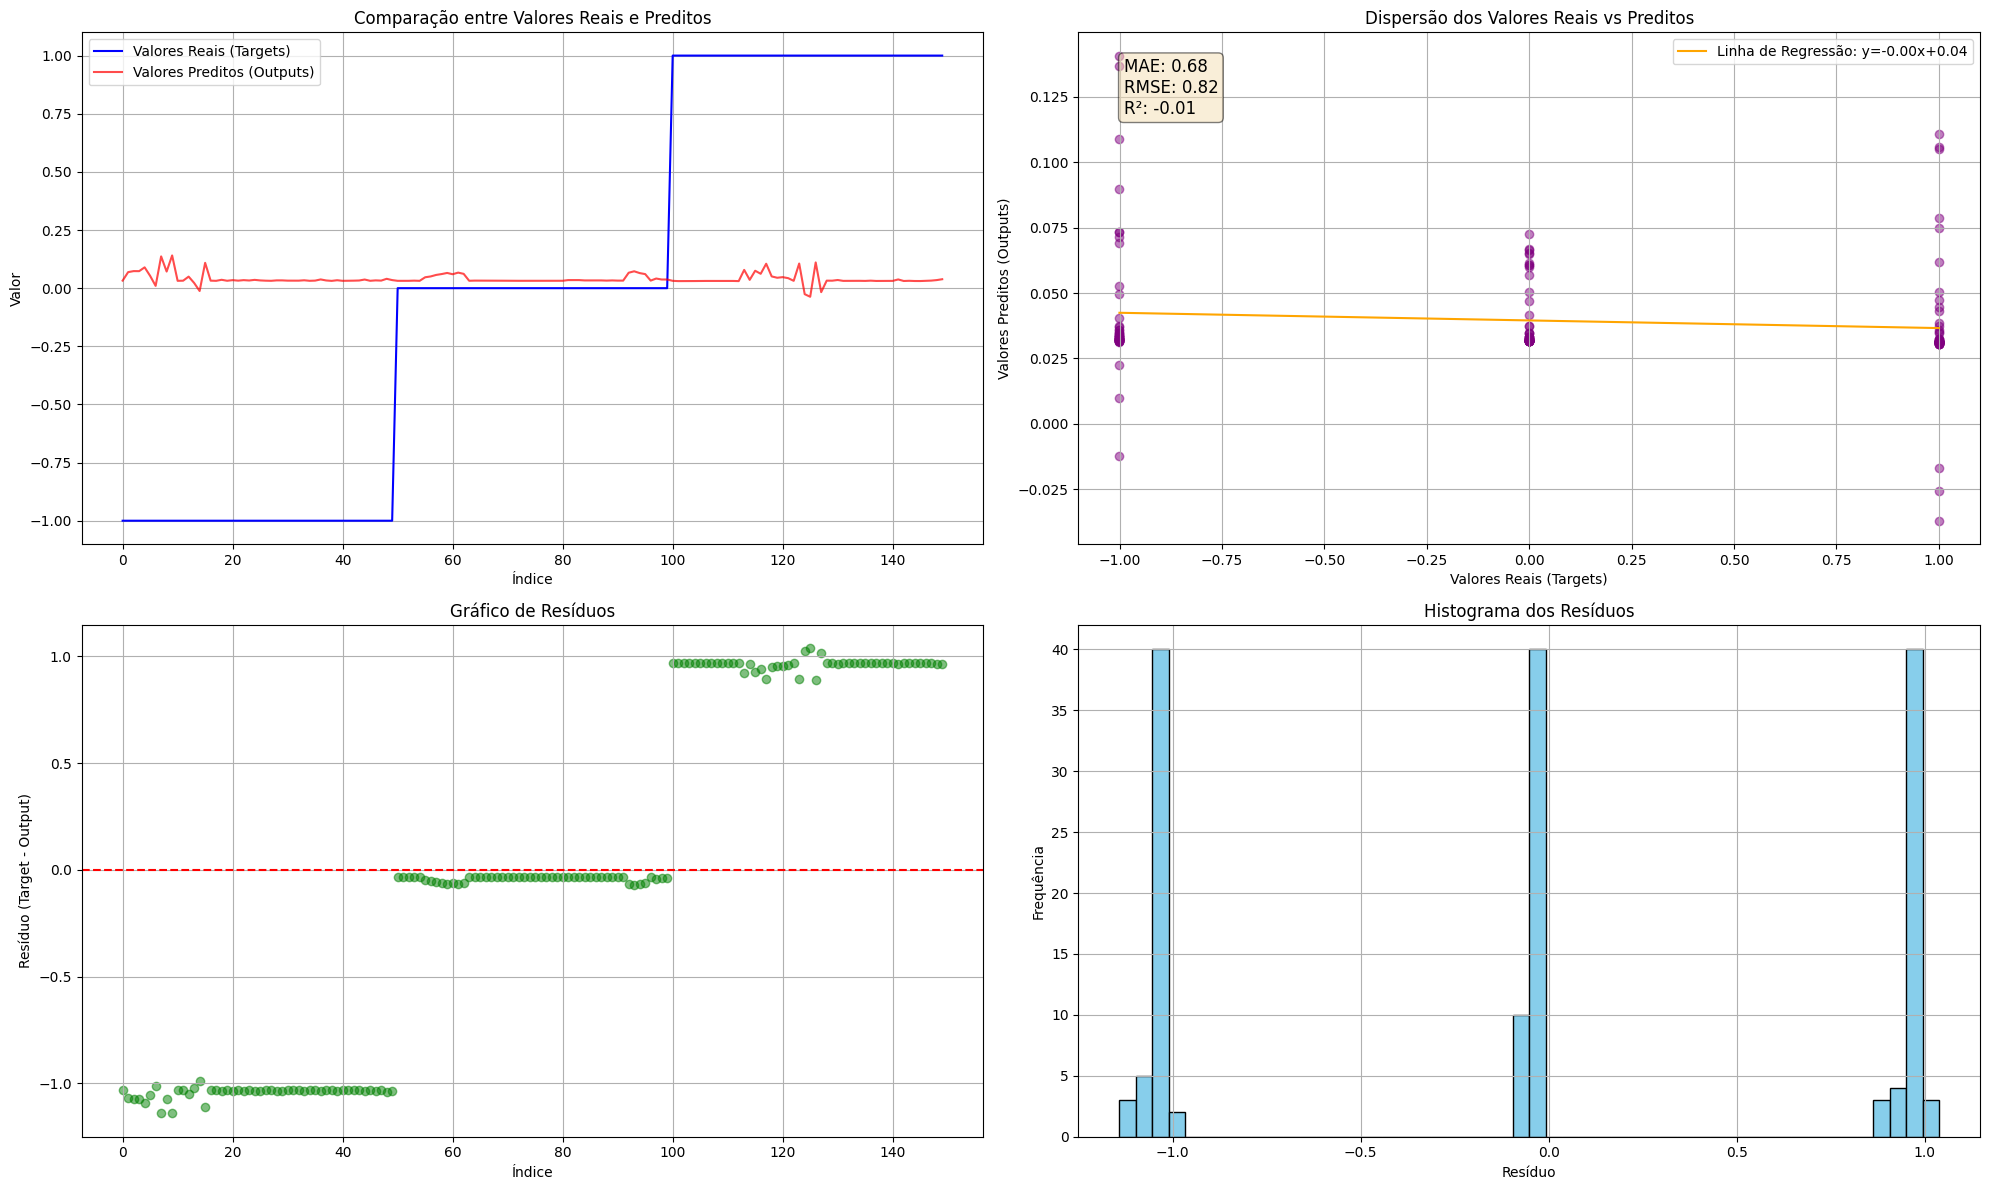

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Converter DataLoader para iterador
data_iter = iter(validation_dataloader)
# Pegar o primeiro lote
embeddings, lengths, targets = next(data_iter)
print("validation_dataloader", embeddings.shape, lengths.shape, targets.shape)

# Garantir os tipos de dados corretos
embeddings = embeddings.to(torch.float32).to('cuda')
lengths = lengths.to(torch.int64).to('cuda')
targets = targets.to(torch.float32).to('cuda')

model.to('cuda')
model.eval()

# Realizar a previsão
with torch.no_grad():
    output = model(embeddings, lengths)

# Verificar os sinais de output e target usando os limites fornecidos
output_sign = (output <= negative_threshold).float() - (output >= positive_threshold).float()
target_sign = (targets <= negative_threshold).float() - (targets >= positive_threshold).float()

# Calcular as correspondências
matches = (output_sign == target_sign)

# Calcular a precisão média
accuracy = matches.float().mean()
print(f"Acurácia: {accuracy:.4f}")

# Aplicar a inversão ao output e aos targets
output_np = output.cpu().numpy().reshape(-1, 1)  # Converter para numpy e garantir formato bidimensional
targets_np = targets.cpu().numpy().reshape(-1, 1)  # O mesmo para os targets

# Inversão
output_inverse = scaler.inverse_transform(output_np)
targets_inverse = scaler.inverse_transform(targets_np)

# Ordenar os targets em ordem crescente e rearranjar os outputs de acordo
sorted_indices = targets_inverse.argsort(axis=0).flatten()  # Obter índices que ordenam os targets
targets_sorted = targets_inverse[sorted_indices]
output_sorted = output_inverse[sorted_indices]

# Aplicar a transformação inversa assinada, se necessário
targets_sorted_transformed = np.array([inverse_signed_log_transform(t[0]) for t in targets_sorted])
output_sorted_transformed = np.array([inverse_signed_log_transform(o[0]) for o in output_sorted])

# Calcular métricas de avaliação
mae = mean_absolute_error(targets_sorted_transformed, output_sorted_transformed)
rmse = np.sqrt(mean_squared_error(targets_sorted_transformed, output_sorted_transformed))
r2 = r2_score(targets_sorted_transformed, output_sorted_transformed)

# Criar uma figura com três subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Gráfico 1: Comparação entre Valores Reais e Preditos
axes[0, 0].plot(targets_sorted_transformed, label='Valores Reais (Targets)', color='blue')
axes[0, 0].plot(output_sorted_transformed, label='Valores Preditos (Outputs)', color='red', alpha=0.7)
axes[0, 0].set_xlabel('Índice')
axes[0, 0].set_ylabel('Valor')
axes[0, 0].set_title('Comparação entre Valores Reais e Preditos')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gráfico 2: Gráfico de Dispersão com Linha de Regressão
axes[0, 1].scatter(targets_sorted_transformed, output_sorted_transformed, alpha=0.5, color='purple')
# Linha de regressão
m, b = np.polyfit(targets_sorted_transformed, output_sorted_transformed, 1)
axes[0, 1].plot(targets_sorted_transformed, m * targets_sorted_transformed + b, color='orange', label=f'Linha de Regressão: y={m:.2f}x+{b:.2f}')
axes[0, 1].set_xlabel('Valores Reais (Targets)')
axes[0, 1].set_ylabel('Valores Preditos (Outputs)')
axes[0, 1].set_title('Dispersão dos Valores Reais vs Preditos')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Gráfico 3: Gráfico de Resíduos
residuals = targets_sorted_transformed - output_sorted_transformed
axes[1, 0].scatter(range(len(residuals)), residuals, alpha=0.5, color='green')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Índice')
axes[1, 0].set_ylabel('Resíduo (Target - Output)')
axes[1, 0].set_title('Gráfico de Resíduos')
axes[1, 0].grid(True)

# Gráfico 4: Histograma dos Resíduos
axes[1, 1].hist(residuals, bins=50, color='skyblue', edgecolor='black')
axes[1, 1].set_xlabel('Resíduo')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Histograma dos Resíduos')
axes[1, 1].grid(True)

# Adicionar métricas no gráfico de dispersão
metrics_text = f"MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}"
axes[0, 1].text(0.05, 0.95, metrics_text, transform=axes[0, 1].transAxes,
               fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir a figura
plt.show()

In [9]:
import torch
import torch.nn as nn

class CustomHuberLoss(nn.Module):
    def __init__(self, delta=1.0):
        super(CustomHuberLoss, self).__init__()
        self.delta = delta
        self.huber_loss = nn.HuberLoss(delta=delta)

    def forward(self, output, target):
        # Definir os limites para considerar positivo ou negativo
        negative_threshold = -1.72
        positive_threshold = 1.72

        # Verificar os sinais de output e target usando os limites fornecidos
        output_sign = (output < negative_threshold).float() - (output > positive_threshold).float()
        target_sign = (target < negative_threshold).float() - (target > positive_threshold).float()

        # Calcular a perda Huber normal
        loss = self.huber_loss(output, target)

        # Verificar se o sinal de output é diferente de target
        sign_diff = (output_sign != target_sign).float()

        # Se os sinais forem diferentes, multiplicar a perda por 2
        adjusted_loss = loss * (1 + sign_diff)  # Duas vezes a perda se os sinais forem diferentes

        return adjusted_loss.mean()

In [21]:
import torch

# Função de teste da CustomHuberLoss
def test_all_sign_cases():
    # Instanciar a perda customizada
    criterion = CustomHuberLoss(delta=1.0)

    # Exemplo 1: Ambos positivos
    output1 = torch.tensor([2.0])  # Positivo
    target1 = torch.tensor([3.0])  # Positivo
    loss1 = criterion(output1, target1)
    print(f"Loss 2.0 3.0 (ambos positivos): {loss1.item()}")  # Esperado: perda normal

    # Exemplo 2: Ambos negativos
    output2 = torch.tensor([-2.0])  # Negativo
    target2 = torch.tensor([-3.0])  # Negativo
    loss2 = criterion(output2, target2)
    print(f"Loss -2.0 -3.0 (ambos negativos): {loss2.item()}")  # Esperado: perda normal

    # Exemplo 3: Output positivo, target negativo
    output3 = torch.tensor([2.0])  # Positivo
    target3 = torch.tensor([-3.0])  # Negativo
    loss3 = criterion(output3, target3)
    print(f"Loss 2.0 -3.0 (output positivo, target negativo): {loss3.item()}")  # Esperado: perda * 2

    # Exemplo 4: Output negativo, target positivo
    output4 = torch.tensor([-2.0])  # Negativo
    target4 = torch.tensor([3.0])  # Positivo
    loss4 = criterion(output4, target4)
    print(f"Loss -2.0 3.0 (output negativo, target positivo): {loss4.item()}")  # Esperado: perda * 2

    # Exemplo 5: Output dentro do intervalo, target positivo
    output5 = torch.tensor([0.5])  # Dentro do intervalo
    target5 = torch.tensor([2.0])  # Positivo
    loss5 = criterion(output5, target5)
    print(f"Loss 0.5 2.0 (output dentro do intervalo, target positivo): {loss5.item()}")  # Esperado: perda normal

    # Exemplo 6: Output dentro do intervalo, target negativo
    output6 = torch.tensor([-0.5])  # Dentro do intervalo
    target6 = torch.tensor([-2.0])  # Negativo
    loss6 = criterion(output6, target6)
    print(f"Loss -0.5 -2.0 (output dentro do intervalo, target negativo): {loss6.item()}")  # Esperado: perda normal

    # Exemplo 7: Ambos dentro do intervalo, mas sinais diferentes
    output7 = torch.tensor([-0.5])  # Dentro do intervalo, negativo
    target7 = torch.tensor([0.5])  # Dentro do intervalo, positivo
    loss7 = criterion(output7, target7)
    print(f"Loss -0.5 0.5 (sinais diferentes dentro do intervalo): {loss7.item()}")  # Esperado: perda * 2

test_all_sign_cases()

Loss 2.0 3.0 (ambos positivos): 0.5
Loss -2.0 -3.0 (ambos negativos): 0.5
Loss 2.0 -3.0 (output positivo, target negativo): 9.0
Loss -2.0 3.0 (output negativo, target positivo): 9.0
Loss 0.5 2.0 (output dentro do intervalo, target positivo): 1.0
Loss -0.5 -2.0 (output dentro do intervalo, target negativo): 1.0
Loss -0.5 0.5 (sinais diferentes dentro do intervalo): 1.0


In [19]:
from datasets import load_dataset
from scipy.stats import pearsonr, spearmanr
import torch

# Carregar o conjunto de dados de avaliação (STS Benchmark)
eval_dataset = load_dataset("sentence-transformers/stsb", split="validation")

# Listas para armazenar as pontuações reais e as previsões do modelo
true_scores = []
pred_scores = []

model.to('cuda')
model.eval()
with torch.no_grad():
	for example in eval_dataset:
		# Tokenização combinada
		encoding = embedding_generator.tokenizer(
			[example['sentence1'], example['sentence2']],
			return_tensors="pt",
			padding=True,  # Padding dinâmico
			truncation=True
		)

		# Converter para o dispositivo
		input_ids1 = encoding['input_ids'][0]
		attention_mask1 = encoding['attention_mask'][0]
		input_ids2 = encoding['input_ids'][1]
		attention_mask2 = encoding['attention_mask'][1]

		# Obter embeddings
		embeddings1 = embedding_generator.weights[input_ids1]
		embeddings2 = embedding_generator.weights[input_ids2]        
		
		# Concatenar as duas sequências no eixo 1
		embeddings = torch.stack([embeddings1, embeddings2]).float().unsqueeze(0).to('cuda')  # (batch_size, 2, seq_length, vector_size)
		
		# Calcular comprimentos
		lengths1 = attention_mask1.sum(dim=0)
		lengths2 = attention_mask2.sum(dim=0)
		lengths = torch.stack([lengths1, lengths2]).float().unsqueeze(0).to('cuda')  # (batch_size, 2)

		# Converter targets
		score = torch.tensor(example['score'], dtype=torch.float16).unsqueeze(0).to('cuda')  # (batch_size,)

		# Obter a previsão do modelo
		prediction = model(embeddings, lengths)
		#output_np = prediction.cpu().numpy().reshape(-1, 1)
		
		pred_score = 1 / (1 + abs(prediction))
		#pred_score = 1 / (1 + abs(inverse_signed_log_transform(output_np.item())))

		# Armazenar as pontuações
		true_scores.append(score.item())
		pred_scores.append(pred_score.item())

# Calcular as métricas de correlação
pearson_corr, _ = pearsonr(true_scores, pred_scores)
spearman_corr, _ = spearmanr(true_scores, pred_scores)

print("Similaridade Inversa da Diferença Absoluta")
print(f"Correlação de Pearson: {pearson_corr:.4f}")
print(f"Correlação de Spearman: {spearman_corr:.4f}")

Similaridade Inversa da Diferença Absoluta
Correlação de Pearson: 0.0342
Correlação de Spearman: 0.0227


In [20]:
import torch
from datasets import load_dataset
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm  # Para acompanhar o progresso
import numpy as np  # Certifique-se de importar o NumPy

# Carregar o conjunto de dados de avaliação (STS Benchmark)
eval_dataset = load_dataset("sentence-transformers/stsb", split="validation")

# Definir o intervalo de valores de k a serem testados
k_values = np.arange(0.001, 100.0, 0.01)
best_k = None
best_pearson = -1  # Inicialização com um valor baixo
best_spearman = -1

# Pré-computar todas as predições para evitar recalcular múltiplas vezes
true_scores = []
predictions = []

model.to('cuda')
model.eval()
with torch.no_grad():
    for example in tqdm(eval_dataset, desc="Processando exemplos"):
        # Tokenização combinada
        encoding = embedding_generator.tokenizer(
            [example['sentence1'], example['sentence2']],
            return_tensors="pt",
            padding=True,  # Padding dinâmico
            truncation=True
        )

        # Converter para o dispositivo
        input_ids1 = encoding['input_ids'][0]
        attention_mask1 = encoding['attention_mask'][0]
        input_ids2 = encoding['input_ids'][1]
        attention_mask2 = encoding['attention_mask'][1]

        # Obter embeddings
        embeddings1 = embedding_generator.weights[input_ids1]
        embeddings2 = embedding_generator.weights[input_ids2]        
        
        # Concatenar as duas sequências no eixo 1
        embeddings = torch.stack([embeddings1, embeddings2]).float().unsqueeze(0).to('cuda')  # (batch_size, 2, seq_length, vector_size)
        
        # Calcular comprimentos
        lengths1 = attention_mask1.sum(dim=0)
        lengths2 = attention_mask2.sum(dim=0)
        lengths = torch.stack([lengths1, lengths2]).float().unsqueeze(0).to('cuda')  # (batch_size, 2)

        # Converter targets
        score = torch.tensor(example['score'], dtype=torch.float16).unsqueeze(0).to('cuda')  # (batch_size,)

        # Obter a previsão do modelo
        prediction = model(embeddings, lengths)
        predictions.append(prediction.item())

        # Armazenar as pontuações reais como valores escalares
        true_scores.append(score.item())

true_scores = np.array(true_scores)  # Agora é um array 1D
predictions = np.array(predictions)

# Iterar sobre os valores de k para encontrar o melhor
for k in tqdm(k_values, desc="Buscando o melhor k"):
    pred_scores = np.exp(-k * np.abs(predictions))
    
    pearson_corr, _ = pearsonr(true_scores, pred_scores)
    spearman_corr, _ = spearmanr(true_scores, pred_scores)
    
    # Verificar se este k é o melhor até agora
    if pearson_corr > best_pearson:
        best_pearson = pearson_corr
        best_spearman = spearman_corr
        best_k = k

print("Similaridade Baseada em Exponencial")
print(f"Melhor valor de k: {best_k}")
print(f"Correlação de Pearson: {best_pearson:.4f}")
print(f"Correlação de Spearman: {best_spearman:.4f}")

Buscando o melhor k: 100%|██████████| 10000/10000 [00:17<00:00, 555.90it/s]

Similaridade Baseada em Exponencial
Melhor valor de k: 0.001
Correlação de Pearson: 0.0345
Correlação de Spearman: 0.0227


In [ ]:
import os
import torch
from sentence_transformers import SentenceTransformer, util
from datasets import load_dataset
from scipy.stats import pearsonr, spearmanr

# Verificar se CUDA está disponível
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Carregar o modelo SentenceTransformer
model = SentenceTransformer("all-mpnet-base-v2").to(device)

# Carregar o conjunto de dados de avaliação (STS Benchmark)
eval_dataset = load_dataset("sentence-transformers/stsb", split="validation")

# Listas para armazenar as pontuações reais e as previsões do modelo
true_scores = []
pred_scores = []

# Obter as sentenças e os escores do conjunto de dados
sentences1 = eval_dataset['sentence1']
sentences2 = eval_dataset['sentence2']
scores = eval_dataset['score']

# Processar uma frase por vez
for i in range(len(eval_dataset)):
    sentence1 = sentences1[i]
    sentence2 = sentences2[i]
    true_score = scores[i]

    # Gerar embeddings para ambas as sentenças individualmente
    embedding1 = model.encode(sentence1, convert_to_tensor=True, device=device, show_progress_bar=False)
    embedding2 = model.encode(sentence2, convert_to_tensor=True, device=device, show_progress_bar=False)

    # Calcular a similaridade cosseno
    cosine_score = util.cos_sim(embedding1, embedding2).item()

    # Escalar a similaridade cosseno de [-1, 1] para [0, 1]
    scaled_score = (cosine_score + 1) / 2

    # Armazenar as pontuações
    true_scores.append(true_score)
    pred_scores.append(scaled_score)

# Calcular as métricas de correlação
pearson_corr, _ = pearsonr(true_scores, pred_scores)
spearman_corr, _ = spearmanr(true_scores, pred_scores)

print(f"Correlação de Pearson: {pearson_corr:.4f}")
print(f"Correlação de Spearman: {spearman_corr:.4f}")